In [20]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns 

In [3]:
path = r'C:\Users\USER\Documents\victor thompson-files\diabetes.csv'

if os.path.exists(path):
    print('File Found!')
else:
    ('File not found')

df = pd.read_csv(path)
df.head()

File Found!


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
cols_with_zeros = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']

df[cols_with_zeros] = df[cols_with_zeros].replace({0:np.nan})

df.fillna(df[cols_with_zeros].mean(), inplace=True)

df.round(1)

df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.00000,155.548223,33.6,0.627,50,1
1,1,85.0,66.0,29.00000,155.548223,26.6,0.351,31,0
2,8,183.0,64.0,29.15342,155.548223,23.3,0.672,32,1
3,1,89.0,66.0,23.00000,94.000000,28.1,0.167,21,0
4,0,137.0,40.0,35.00000,168.000000,43.1,2.288,33,1


# 1.  Calculate the average, minimun, and maximum value for Glucose, BloodPressure, BMI, Age

In [6]:
metrics_stats = df.agg({
    'Glucose': ['mean', 'min', 'max'],
    'BloodPressure': ['mean', 'min', 'max'],
    'BMI': ['mean', 'min', 'max'],
    'Age': ['mean', 'min', 'max']
})

metrics_stats

,Glucose,BloodPressure,BMI,Age
mean,121.686763,72.405184,32.457464,33.240885
min,44.000000,24.000000,18.200000,21.000000
max,199.000000,122.000000,67.100000,81.000000


# 2. Find the total number of patients 

In [7]:
df.shape[0]

768

# 3. How many patients have diabetes (Outcome=1)?

In [8]:
df[df['Outcome']==1].shape[0]

268

# 4. Distribution of number of pregnancies

In [9]:
df.value_counts('Pregnancies')

Pregnancies
1     135
0     111
2     103
3      75
4      68
5      57
6      50
7      45
8      38
9      28
10     24
11     11
13     10
12      9
14      2
15      1
17      1
Name: count, dtype: int64

# 5. Average glucose level for patients with and without diabetes

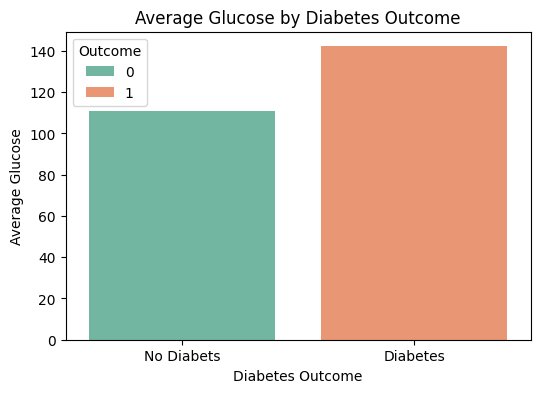

In [18]:
avg_glucose = df.groupby('Outcome')['Glucose'].mean().reset_index()


plt.figure(figsize=(6,4))
sns.barplot(x='Outcome', y='Glucose',  hue='Outcome', data=avg_glucose, palette='Set2')
plt.title("Average Glucose by Diabetes Outcome")
plt.xlabel('Diabetes Outcome')
plt.ylabel('Average Glucose')
plt.xticks([0,1],['No Diabets', 'Diabetes'])
plt.show()

# 6. Find the average BMI for patients with and without diabetics.

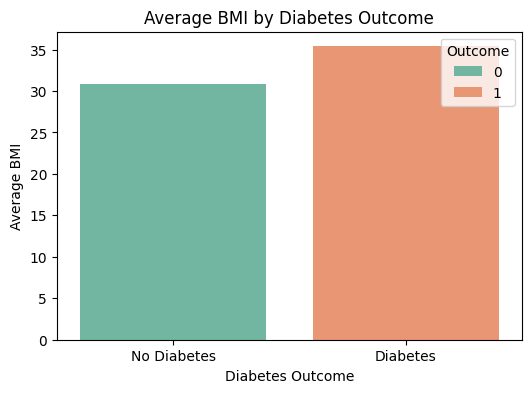

In [17]:
import seaborn as sns
avg_BMI = df.groupby('Outcome')['BMI'].mean().reset_index()


plt.figure(figsize=(6,4))
sns.barplot(x='Outcome', y='BMI', hue='Outcome', data=avg_BMI, palette='Set2')
plt.title('Average BMI by Diabetes Outcome')
plt.xlabel('Diabetes Outcome')
plt.ylabel('Average BMI')
plt.xticks([0,1], ['No Diabetes', 'Diabetes'])
plt.show()

# 7. What is the diabetes prevalence by age group?

In [237]:
df['Age'] = pd.to_numeric(df['Age'], errors='coerce')

bins = [0, 29, 39, float('inf')]
labels = ['<30', '30-39', '40+']
df['AgeGroup'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)

prevalence_by_age_group = df.groupby('AgeGroup', observed=True)['Outcome'].mean()*100
prevalence_by_age_group



AgeGroup
<30      19.346049
30-39    47.252747
40+      50.684932
Name: Outcome, dtype: float64

# 8. Compare glucose levels between diabetics and non-diabetics visually

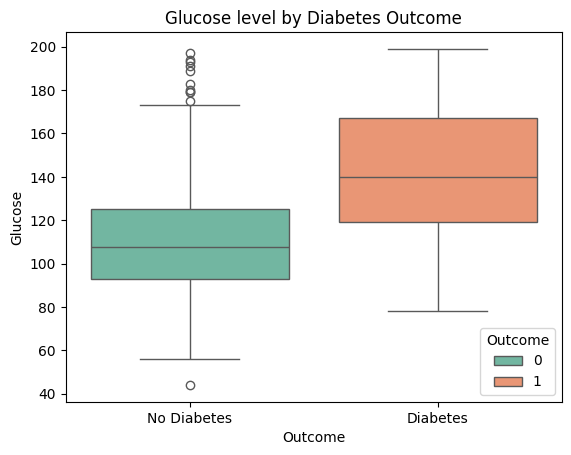

In [263]:
sns.boxplot(x='Outcome',
            y='Glucose',
            data=df,
            palette ='Set2',
            hue ='Outcome'
           )
plt.title('Glucose level by Diabetes Outcome')
plt.xticks([0,1],['No Diabetes', 'Diabetes'])
plt.show()

# 9. Correlation between Glucose and Diabetes

In [260]:
corr = df[['Glucose', 'Outcome']].corr().iloc[0,1]
print(f"Correlation betweeen Glucose and Diabetes: {corr:.2f}")

Correlation betweeen Glucose and Diabetes: 0.49


In [264]:
print("""
Insights:
1. Older patients have a higher diabetes prevalence.
2. Glucose >= 140 strongly linked with diabetes.
3. Average BMI is higher among diabetics.
4. Younger patients (<30)have lower prevalence but still at risk with highBMI.
""")


Insights:
1. Older patients have a higher diabetes prevalence.
2. Glucose >= 140 strongly linked with diabetes.
3. Average BMI is higher among diabetics.
4. Younger patients (<30)have lower prevalence but still at risk with highBMI.

